# Energy Consumption in Netherlands 

## Gathering data

In [1]:
import pandas as pd

In [2]:
years = range(2010,2020)
providers= ['enexis','liander','stedin']
pieces= []

for year in years:
    for provider in providers:
        if provider != 'stedin':
            path= 'dutch-energy/Electricity/{0}_electricity_0101{1}.csv'.format(provider,int(year))
        else :
            path= 'dutch-energy/Electricity/{0}_electricity_{1}.csv'.format(provider,int(year))
        frame = pd.read_csv(path)
        frame['year']=year
        #rewrite the net_manager column value with the provider (enexis/liander/stedin) because some values in this 
        #column are represented by code numbers and some by the providers which are not consistent, so this make it more tidy
        frame['net_manager']=provider 
        pieces.append(frame)
        
eltr_df=pd.concat(pieces,ignore_index=True, sort=False)
        

In [3]:
years = range(2010,2020)
providers= ['enexis','liander','stedin']
pieces= []

for year in years:
    for provider in providers:
        if provider != 'stedin':
            path= 'dutch-energy/Gas/{0}_gas_0101{1}.csv'.format(provider,int(year))
        else :
            path= 'dutch-energy/Gas/{0}_gas_{1}.csv'.format(provider,int(year))
        frame = pd.read_csv(path)
        frame['year']=year
        frame['net_manager']=provider 
        pieces.append(frame)
        
gas_df=pd.concat(pieces,ignore_index=True, sort=False)
        

There are two sets of dataset that represents electricity data and named as `eltr_df` and another one as `gas_df` that represent the gas data.

In [4]:
#overview of the electricity data
eltr_df.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
0,enexis,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100.0,16.0,100.0,NaN,NaN,4282.0,25.0,0.0,2010
1,enexis,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,100.0,11.0,100.0,NaN,NaN,5113.0,10.0,0.0,2010
2,enexis,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100.0,30.0,100.0,NaN,NaN,4809.0,34.0,0.0,2010
3,enexis,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,100.0,21.0,100.0,NaN,NaN,5015.0,44.0,0.0,2010
4,enexis,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,100.0,12.0,100.0,NaN,NaN,3074.0,22.0,0.0,2010


In [5]:
#overview of the gas data
gas_df.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
0,enexis,ENEXIS,Antwerpsestraat,4611AC,4611AD,BERGEN OP ZOOM,100.0,17.0,100.0,NaN,NaN,496.0,0.0,NaN,2010
1,enexis,ENEXIS,Antwerpsestraat,4611AE,4611AE,BERGEN OP ZOOM,100.0,11.0,100.0,NaN,NaN,355.0,0.0,NaN,2010
2,enexis,ENEXIS,Antwerpsestraat,4611AG,4611AJ,BERGEN OP ZOOM,100.0,24.0,100.0,NaN,NaN,3074.0,0.0,NaN,2010
3,enexis,ENEXIS,Antwerpsestraat,4611AK,4611AK,BERGEN OP ZOOM,100.0,14.0,100.0,NaN,NaN,13456.0,0.0,NaN,2010
4,enexis,ENEXIS,Zuid - Oostsingel,4611AL,4611BA,BERGEN OP ZOOM,100.0,23.0,100.0,NaN,NaN,10096.0,0.0,NaN,2010


## Assessing Data

In [6]:
eltr_df.info(), gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351624 entries, 0 to 3351623
Data columns (total 15 columns):
net_manager                     object
purchase_area                   object
street                          object
zipcode_from                    object
zipcode_to                      object
city                            object
delivery_perc                   float64
num_connections                 float64
perc_of_active_connections      float64
type_conn_perc                  float64
type_of_connection              object
annual_consume                  float64
annual_consume_lowtarif_perc    float64
smartmeter_perc                 float64
year                            int64
dtypes: float64(7), int64(1), object(7)
memory usage: 383.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2901043 entries, 0 to 2901042
Data columns (total 15 columns):
net_manager                     object
purchase_area                   object
street                          object
zi

(None, None)

In [7]:
#finding the null values for columns in both dataframe
eltr_df.isna().sum(),gas_df.isna().sum()

(net_manager                          0
 purchase_area                   813492
 street                               0
 zipcode_from                         0
 zipcode_to                           0
 city                                 0
 delivery_perc                      582
 num_connections                      0
 perc_of_active_connections           0
 type_conn_perc                  107512
 type_of_connection              107581
 annual_consume                       0
 annual_consume_lowtarif_perc         0
 smartmeter_perc                      0
 year                                 0
 dtype: int64, net_manager                          0
 purchase_area                   235935
 street                               0
 zipcode_from                         0
 zipcode_to                           0
 city                                 0
 delivery_perc                        0
 num_connections                      0
 perc_of_active_connections           0
 type_conn_perc           

In [8]:
#find if there is any duplicate in both df
(gas_df.duplicated().sum(),gas_df.duplicated().sum()) 

(0, 0)

## Data Visualisation

### How are all three network administrators total connections for each year from 2010-2019?

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')


In [10]:
#network adminstrator as 'na'
#grouping the data by year and ther network manager(enexis,liander or stedin)
na_eltr= eltr_df.groupby(['year','net_manager']) 
na_el_conn= na_eltr.num_connections.sum()
na_el_conn.head()

year  net_manager
2010  enexis         2311361.0
      liander        3056931.0
      stedin         2016388.0
2011  enexis         2338819.0
      liander        3095020.0
Name: num_connections, dtype: float64

In [11]:
#reshape the data for plotting
na_el_conn=na_el_conn.reset_index()
na_el_conn.head()

,year,net_manager,num_connections
0,2010,enexis,2311361.0
1,2010,liander,3056931.0
2,2010,stedin,2016388.0
3,2011,enexis,2338819.0
4,2011,liander,3095020.0


In [12]:
#repeat the above for gas data
na_gas= gas_df.groupby(['year','net_manager']) 
na_gas_conn= na_gas.num_connections.sum()
na_gas_conn=na_gas_conn.reset_index()


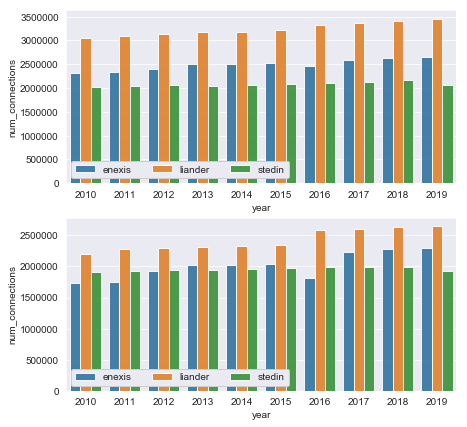

In [13]:
plt.figure(figsize=[7,7])

plt.subplot(2,1,1)
ax1 = sns.barplot(data= na_el_conn,x='year', y= 'num_connections',hue='net_manager',alpha=0.9)
plt.legend(loc=3,ncol=3, framealpha=1)

plt.subplot(2,1,2)
ax2 = sns.barplot(data= na_gas_conn,x='year', y= 'num_connections',hue='net_manager',alpha=0.9)
ax2.legend(loc=3,ncol=3, framealpha=1)

plt.show()

Liander have the highest total connections for each year and the total connections increases for liander and enexis throughout the decade. Stedin on the other hand doesn't show any significant improvement for the electricity connections throughout the years.

### The total consumption of Electricity (kWh) and Gas (m3) across the years

To see the consumption for both electricity and gas for each year, what I did was to compare the total consumption for each year and compare them with the mean consumption for each connection. I wanted to see if the consumption correlate with people using more energy.

In [14]:
#create a new column of 'cons_per_conn' which represent the value of consumption per connection
eltr_df['cons_per_conn']=eltr_df['annual_consume']/eltr_df['num_connections']
gas_df['cons_per_conn']=gas_df['annual_consume']/gas_df['num_connections']


eltr_df.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year,cons_per_conn
0,enexis,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100.0,16.0,100.0,NaN,NaN,4282.0,25.0,0.0,2010,267.625000
1,enexis,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,100.0,11.0,100.0,NaN,NaN,5113.0,10.0,0.0,2010,464.818182
2,enexis,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100.0,30.0,100.0,NaN,NaN,4809.0,34.0,0.0,2010,160.300000
3,enexis,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,100.0,21.0,100.0,NaN,NaN,5015.0,44.0,0.0,2010,238.809524
4,enexis,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,100.0,12.0,100.0,NaN,NaN,3074.0,22.0,0.0,2010,256.166667


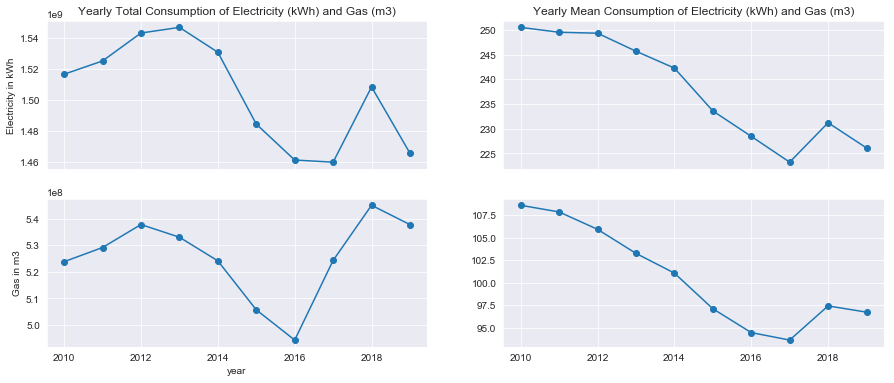

In [15]:
x1 = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
#x2 is the same as x1, so they will share x axis

y1 = eltr_df.groupby('year').annual_consume.sum()
y2 = gas_df.groupby('year').annual_consume.sum()
y3 = eltr_df.groupby('year').cons_per_conn.mean()
y4 = gas_df.groupby('year').cons_per_conn.mean()

plt.figure(figsize=(15,6))

ax1=plt.subplot(2, 2, 1)
plt.plot(x1, y1, 'o-')
plt.title('Yearly Total Consumption of Electricity (kWh) and Gas (m3)')
plt.ylabel('Electricity in kWh')
#change the visibility of the xtick to not visible
plt.setp(ax1.get_xticklabels(), visible=False)

ax2=plt.subplot(2, 2, 3,sharex=ax1)
plt.plot(y2,'o-')
plt.xlabel('year')
plt.ylabel('Gas in m3')

ax3=plt.subplot(2, 2, 2)
plt.plot(x1, y3, 'o-')
plt.setp(ax3.get_xticklabels(), visible=False)
plt.title('Yearly Mean Consumption of Electricity (kWh) and Gas (m3)')

ax4=plt.subplot(2, 2, 4,sharex=ax1)
plt.plot(y4, 'o-')

plt.show()

It is interesting to see that the trend of the total energy and gas consumption increases from 2010 to 2012 then continuously drop to the lowest level in 2016 for electricity and 2017 for the gas. After that the trend increases back and year 2018 marked as the highest consumption in the past decade for gas. The increase of gas price since 2010 could lead to reducing the demand of gas energy and the demand show declination since 2012 until it reach the lowest in 2016. Weather is also a price indicator for gas which could play role in the total energy consumtion. This can be points to dig deeper into this.

Meanwhile, the plots on the right show the mean consumption of both electricity and gas. This plot however show that the overal trend of the consumption are getting less year by year. Eventhouh the average household consumption of electricity and gas in 2018 increas than the previous year, they are still much lower than in year 2010. Which means on average the energy used by dutch people are getting less in the past decade. Do they opt for more renewable energy? Let find out about that next.

### What are the trend of the dutch people using renewable energy?

The `delivery_perc` show the values of the net consumption of the electricity/gas and the lower the percentage mean more energy are given back. Assuming the energy given are are the renewable energy produces by the dutch, what I did here is calculate the percentage of the energy given back and using the data to calculated the mean of energy produce for each year and plot them.

In [16]:
#create a new column that store value of percentage energy produced
eltr_df['renew_perc']= 100-eltr_df.delivery_perc

In [17]:
#mask only the data that give back energy 
#and find the mean values based on year
renew_mean=eltr_df[eltr_df.renew_perc > 0].groupby(['year']).renew_perc.mean()
renew_mean

year
2010     6.407625
2011     6.199930
2012     6.091108
2013     6.314488
2014     9.491075
2015     9.998721
2016    11.165215
2017    12.222820
2018    13.849552
2019    16.379866
Name: renew_perc, dtype: float64

In [18]:
#find whether the mean value of energy given back increase or decrease compare to the previous year
renew_mean_diff=renew_mean.diff()
renew_mean_diff

year
2010         NaN
2011   -0.207695
2012   -0.108822
2013    0.223381
2014    3.176587
2015    0.507646
2016    1.166494
2017    1.057605
2018    1.626732
2019    2.530314
Name: renew_perc, dtype: float64

The highest increment of energy given back(more people produce renewable energy like solar) is in 2014 and the trend increase since 2012 until latest. To make this easier to see, I plotted two graphs showing the pattern of mean energy consume by household and the energy given back yearly.

In [19]:
cons_per_conn= eltr_df.groupby('year').cons_per_conn.mean()

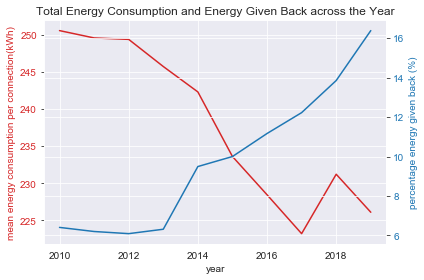

In [20]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('mean energy consumption per connection(kWh)', color=color)
ax1.plot(x1, cons_per_conn, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('percentage energy given back (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(x1,renew_mean, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Total Energy Consumption and Energy Given Back across the Year')

fig.tight_layout()
plt.show()

This plotted plots shows that the mean percentage energy produced increase yearly since the past decade and increase rapidly since 2014 eventhough the household mean energy consumption decreases.

### Which City has high in electricity consumption? 

For this part, I consider to find the cities with high consumption for the year 2018. Are they also among the top cities with total connection numbers? 

In [33]:
top_ct2018= eltr_df[eltr_df['year']==2018].groupby('city').annual_consume.sum().nlargest(5)
top_ct2018

city
AMSTERDAM        55010230.00
'S-GRAVENHAGE    40039600.00
ROTTERDAM        36324022.00
UTRECHT          22459675.00
EINDHOVEN        17574828.49
Name: annual_consume, dtype: float64

In [22]:
eltr_df.groupby('city').num_connections.sum().nlargest(5)

city
AMSTERDAM        4736313.0
ROTTERDAM        3056245.0
'S-GRAVENHAGE    2668500.0
UTRECHT          1368767.0
GRONINGEN         949205.0
Name: num_connections, dtype: float64

It is predicted that the city with higher population will have higher total consumption of energy and the above data proved it. The top 4 cities with highest consumption are Amsterdam, Rotterdam,S-Gravenhage and Utrecht and they have the highest population according to order as well. 


In [38]:
#find the top five cities
cities=top_ct2018.index
cities

Index(['AMSTERDAM', ''S-GRAVENHAGE', 'ROTTERDAM', 'UTRECHT', 'EINDHOVEN'], dtype='object', name='city')

In [39]:
#masking the four cities only, and sum the annual energy consumption by 'city' and 'year'
cities_yr=eltr_df[eltr_df.city.isin(cities)].groupby(['city','year']).annual_consume.sum()
cities_yr

city           year
'S-GRAVENHAGE  2010    40996950.00
               2011    41290159.00
               2012    41531382.00
               2013    41187101.00
               2014    41096176.00
               2015    40013042.00
               2016    39594997.00
               2017    39570695.00
               2018    40039600.00
               2019    37661539.00
AMSTERDAM      2010    54290067.00
               2011    54305845.00
               2012    54422131.00
               2013    54733755.00
               2014    55092954.00
               2015    53253124.00
               2016    55832552.00
               2017    55438717.00
               2018    55010230.00
               2019    54836591.00
EINDHOVEN      2010       31510.00
               2011       30365.00
               2012       30008.00
               2013       50632.00
               2014       56218.00
               2015       56355.00
               2016       74719.00
               2017    16989602.00


In [40]:
#rearrange data for plotting
cities_yr.name='total'
cities_yr=cities_yr.reset_index()
cities_yr

,city,year,total
0,'S-GRAVENHAGE,2010,40996950.00
1,'S-GRAVENHAGE,2011,41290159.00
2,'S-GRAVENHAGE,2012,41531382.00
3,'S-GRAVENHAGE,2013,41187101.00
4,'S-GRAVENHAGE,2014,41096176.00
5,'S-GRAVENHAGE,2015,40013042.00
6,'S-GRAVENHAGE,2016,39594997.00
7,'S-GRAVENHAGE,2017,39570695.00
8,'S-GRAVENHAGE,2018,40039600.00
9,'S-GRAVENHAGE,2019,37661539.00


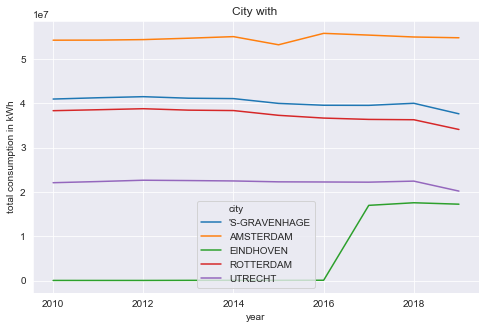

In [41]:
plt.figure(figsize=[8,5])
sns.lineplot(x='year', y='total', hue='city',  data=cities_yr)
plt.ylabel('total consumption in kWh')
plt.title('City with ')
plt.show()

As expected, Amterdam consume the highest energy in Netherlands as it is the main city in Netherlands and has the highest total city population in the country. The energy consumption of Eindoven from 2010 to 2016 seems suspicious  as the value differ so much. This could maybe because there is incomplete or missing data for that particular years.